In [2]:
%load_ext tikzmagic
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
import control
from control.matlab import *

<center>EE3011 Modeling and Control Part II</center>

<center>Asst Prof. Mo Yilin</center>

<center>School of EEE</center>
<center>Room:S1-B1c-104; EXT: 4551</center>
<center>ylmo@ntu.edu.sg</center>


<center>Contents</center>

# Frequency Domain Analysis (6 Hours)
+ Bode plots of transfer functions
+ Frequency domain modeling
+ Nyquist stability 
+ Relative stability

# Frequency Domain Design (3 hours)
+ Lead compensator
+ Lag compensator

# PID Tuning (2 hours)

# Overview (1 hour)

<center>Quizzes</center>

# Quiz 3 (8%) 
- Date: 19-Oct-2016, Wednesday (week 10)
- Time: 10:00am-10:20am (during lecture time)
- Venue: LT22
- Content: Tut#7 and Tut #8

# Quiz 4 (8%) 
- Date: 31-Oct-2016, Monday (Week 12) 
- Time: 12:00nn-12:20pm (during lecture time)
- Content: Tut#9 and Tut#10


# Text:
K. Ogata, Modern Control Engineering, 5th Edition, Prentice Hall, 2010.

# References:
- [1] R.C. Dorf and R.H. Bishop, Modern Control Systems,9th Edition, Prentice Hall, 2000.
- [2] G.E. Franklin, J.D. Powell and A.Emami-Naeini, Feedback Control of Dynamic Systems, 4th Edition, Prentice Hall, 2002. 
- [3] L. Qiu and K. Zhou, Introduction to Feedback Control, Pearson Education International, 2010.



Chapter 1 FREQUENCY DOMAIN ANALYSIS 
# Introduction
Review of time domain analysis
- System modeling
- Time-domain responses systems of control
- Routh-Hurwitz Criterion and Root locus for stability analysis
- Time-domain specifications:
	+ rise time
	+ settling time
	+ maximum overshoot
	+ steady-state error


# What is Frequency Response

RC-Network

\begin{align*}
  \frac{V_0(s)}{V_i(s)}= \frac{1/sC}{R+1/sC} = \frac{1}{\tau s+1},\,\tau=RC.
\end{align*}

\begin{align*}
  v_i(t) = 2\sin(\omega t+ 30^\circ)
\end{align*}

Assuming $R = 1k\Omega$, $C = 10^{-4}F$, then $\tau = 0.1s$.

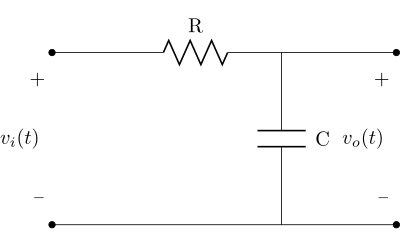

In [4]:
%%tikz -p circuitikz -f svg
\draw (0,0) to [short, *-*] (6,0);
\draw (0,3) to [short, *-] (1,3)
to [R,l=R] (4,3) 
to [short, -*] (6,3);
\draw (4,3) to [C,l=C] (4,0);
\draw (0,0) to [open, american voltages, v^>=${v}_i(t)$] (0,3);
\draw (6,0) to [open, american voltages, v^>=${v}_o(t)$] (6,3);

In [ ]:
# Define System

R = 1e3
C = 1e-4
τ = R * C
sys = tf([1],[τ,1])

<function matplotlib.pyplot.show>

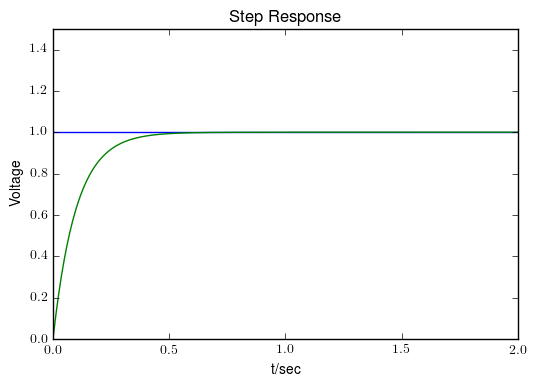

In [8]:
# Step Response
%matplotlib inline

t = np.linspace(0,2,500)
ω = 5
vi = np.ones(t.size)
_, vo = control.step_response(sys,t)

plt.plot(t,vi)
plt.plot(t,vo)
plt.xlabel(r't/sec')
plt.ylabel(r'Voltage');
plt.title(r'Step Response')
plt.ylim(0,1.5)
plt.show;

<function matplotlib.pyplot.show>

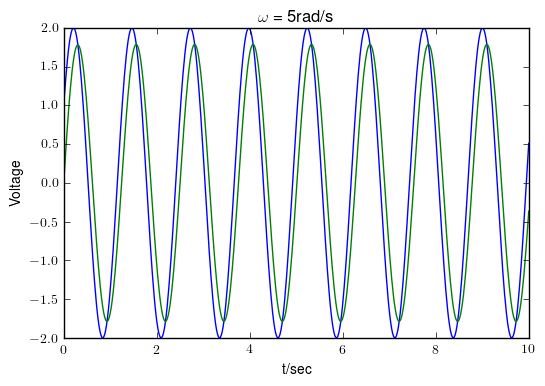

In [29]:
# Frequency response for ω=5rad/s
%matplotlib inline

t = np.linspace(0,10,500)
ω = 5
vi = 2 * np.sin(ω * t+30*2*np.pi/360)
_, vo, _ = control.forced_response(sys,t,vi)

plt.plot(t,vi)
plt.plot(t,vo)
plt.xlabel(r't/sec')
plt.ylabel(r'Voltage');
plt.title(r'$\omega$ = 5rad/s')
plt.show;

<function matplotlib.pyplot.show>

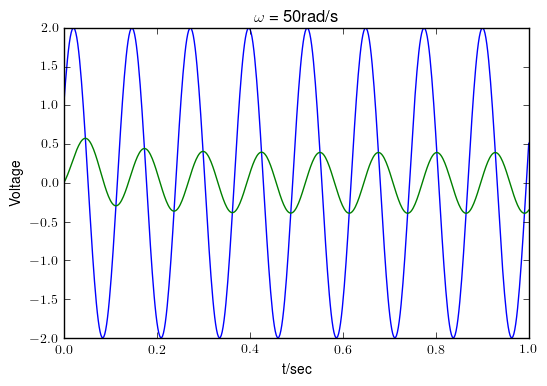

In [28]:
# Frequency response for ω=50rad/s
%matplotlib inline

t = np.linspace(0,1,500)
ω = 50
vi = 2 * np.sin(ω * t+30*2*np.pi/360)
_, vo, _ = control.forced_response(sys,t,vi)

plt.plot(t,vi)
plt.plot(t,vo)
plt.xlabel(r't/sec')
plt.ylabel(r'Voltage');
plt.title(r'$\omega$ = 50rad/s')
plt.show;

# Frequency Response

The frequency response of a system is defined as the **steady-state response** of the system to **a sinusoidal input**.

## How to get frequency response
- The frequency response can be derived from transfer functions
- The frequency response of complex systems can be obtained experimentally
- In fact, for an unknown system, usually we get its transfer function from the frequency response.

## Why do we need frequency response
- The frequency response of a complex system can be derived from the response of simple systems (Bode Plot). 
- The stability of the closed-loop system is determined by the frequency response of the open-loop system (Nyquist Stability Criterion)
- Controller design can be carried out ** in an intuitive fashion** by shaping the frequency response of the open-loop systems (Lag, Lead, PID controller Design)



# How to get Frequency Response from Transfer Function

+ Consider a stable system:
\begin{align*}
  G(s) = \frac{a(s)}{b(s)}=\frac{a(s)}{(s+p_1)\dots(s+p_n)},
\end{align*}
where $p_i$ are assumed to be distinct poles.

+ Consider the input 
\begin{align*}
r(t) = A \exp\left[j\omega t\right] = A\cos(\omega t + \phi)+jA\sin(\omega t+\phi).
\end{align*}
whose Laplace transform is 
\begin{align*}
R(s) = A\exp(j\phi)\frac{1}{s-j\omega}.
\end{align*}


+ The output is given by
\begin{align*}
  Y(s) &= G(s)R(s) \\
       &=  \frac{a(s)}{(s+p_1)\dots(s+p_n)}\times \frac{A\exp(j\phi)}{s-j\omega} \\
       &=\frac{k_1}{s+p_1}+\frac{k_2}{s+p_2}+\dots+\frac{k_n}{s+p_n} + \frac{\alpha}{s-j\omega}. 
\end{align*}

+ If we multiply the LHS and RHS of the equation by $s-j\omega$ and take the limit $s\rightarrow j\omega$, we get

\begin{align*}
  \lim_{s\rightarrow -j\omega}G(s)R(s) = A\exp(j\phi)G(j\omega) = A|G(j\omega)|\times e^{j(\phi + \angle G(j\omega))} = \alpha.
\end{align*}

+ Therefore, the response of the system can be written as
\begin{align*}
y(t) &= k_1e^{-p_1t}+\dots+k_ne^{-p_nt} \\
&+ A|G(j\omega)|\cos(\omega t + \phi + \angle G(j\omega))\\ 
&+j A|G(j\omega)|\sin(\omega t + \phi + \angle G(j\omega)).
\end{align*}

+ If we input $r(t) = A\sin(\omega t + \phi)$, then the steady-state output will be 
\begin{align*}
y_{ss}(t) =  A|G(j\omega)|\sin(\omega t + \phi + \angle G(j\omega)).
\end{align*}

+ The steady-state response of a sinusoidal signal is another sinusoidal signal, where
    1. The frequency is the same.
    2. The amplitude is $A\times |G(j\omega)|$.
    3. The phase is $\phi + \angle G(j\omega)$.
    
+ $|G (j\omega)|$ and $\angle G(j\omega)$ are frequency dependent and are referred to as the magnitude and phase responses of the system, respectively.

# Example

**Question**: Consider the RC-network with transfer function
\begin{align*}
G(s) = \frac{1}{0.1s+1}.
\end{align*}
Find the steady state output due to the input $r(t) = 2\sin(\omega t+ 30^\circ)$.

**Solution**: 
+ Notice that
\begin{align*}
0.1j\omega + 1 = \sqrt{1+0.01\omega^2}\angle \tan^{-1}(0.1\omega).
\end{align*}
+ Thereofre
\begin{align*}
G(j\omega) = \frac{1}{\sqrt{1+0.01\omega^2}}\angle -\tan^{-1}(0.1\omega).
\end{align*}
+ Hence, the response to $r(t)$ is
\begin{align*}
y_{ss}(t) =  \frac{2}{\sqrt{1+0.01\omega^2}}\sin\left[\omega t+30^\circ -\tan^{-1}(0.1\omega)\right].
\end{align*}
+ For $\omega  = 5$, $|G(j5)| = 0.8944$, $\angle G(j5) = -26.6^\circ$.
\begin{align*}
y_{ss}(t) = 1.7888\sin(5t+3.4^\circ).
\end{align*}
+ For $\omega  = 50$, $|G(j5)| = 0.1961$, $\angle G(j5) = -78.7^\circ$.
\begin{align*}
y_{ss}(t) = 0.3922\sin(50t-48.7^\circ).
\end{align*}

# Bode and Nyquist Plot

- From the analysis above, $G(j\omega)$ plays a key role in frequency response. 
- To visualize $G(j\omega)$, the following plots are typically used
    1. Bode Plots: Bode Magnitude Plot + Bode Phase Plot
    2. Nyquist Plots

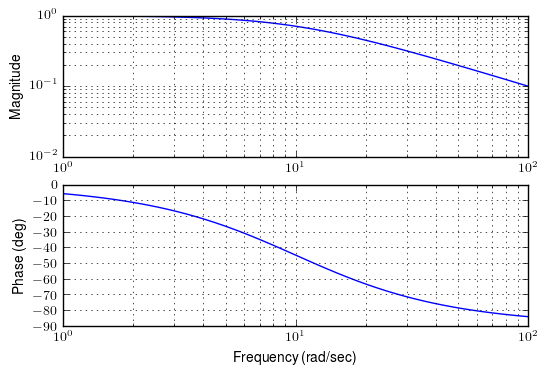

In [14]:
# Bode Plot
%matplotlib inline

control.bode_plot(sys);

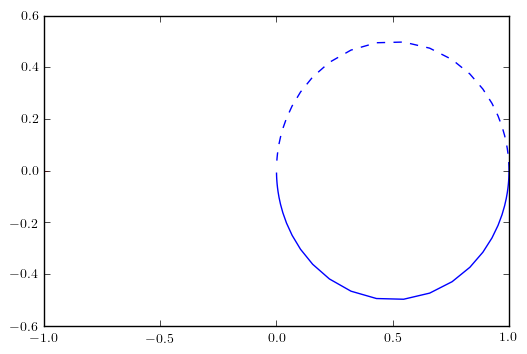

In [10]:
# Nyquist Plot
%matplotlib inline

control.nyquist_plot(sys, omega = [1e-2, 1e3]);

# Real World Example

![VCM](https://www.researchgate.net/profile/Chunling_Du/publication/224089426/figure/fig3/AS:302745262280715@1449191504173/Figure-3-HDD-with-a-VCM-actuator.png)

![Frequency Response](https://www.researchgate.net/profile/Chunling_Du/publication/224089426/figure/fig4/AS:302745266475011@1449191504229/Figure-4-Frequency-responses-of-the-VCM-actuator-LDV-range-2-m-m-V.png)

# Hendrik Wade Bode(1905 - 1982)
![Bode](https://upload.wikimedia.org/wikipedia/en/a/a5/Hendrik_Wade_Bode.png)
- A pioneer of modern control theory and electronic telecommunications.  
- He made important contributions to the design, guidance and control of anti-aircraft systems during World War II 
- During the Cold War, he also made significant contributions to the design and control of missiles and anti-ballistic missiles. 
- Contributions to control system theory and mathematical tools for the analysis of stability of linear systems, inventing **Bode plots**, **gain margin** and **phase margin**. 
- Worked in Bell Lab from 1926 to 1967. Became a professor at Harvard after retiring from Bell Lab.

# Harry Nyquist (1889 - 1976)
![Nyquist](https://upload.wikimedia.org/wikipedia/en/b/b4/Harry_Nyquist.jpg)
- Worked in Bell Lab from 1917 to 1954.
- Received the IEEE Medal of Honor in 1960 for "**fundamental contributions to a quantitative understanding of thermal noise, data transmission and negative feedback**."
- Received the National Academy of Engineering's fourth Founder's Medal "**in recognition of his many fundamental contributions to engineering.**" 

# Summary

The frequency response of a system is defined as the **steady-state response** of the system to **a sinusoidal input**.

It is another sinusoidal signal, where
1. The frequency is the same.
2. The amplitude is $A\times |G(j\omega)|$.
3. The phase is $\phi + \angle G(j\omega)$.

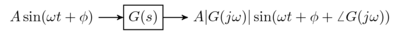

In [18]:
%%tikz -l matrix,arrows

\tikzstyle{point} = [coordinate]
\tikzstyle{box} = [rectangle, draw, semithick]
\matrix[row sep = 10mm, column sep = 6mm]{
\node (p1) [] {$A\sin(\omega t + \phi)$};&
\node (plant) [box] {$G(s)$};&
\node (p2) [] {$A|G(j\omega)|\sin(\omega t + \phi+\angle G(j\omega))$};\\
};
\draw [semithick,-stealth'] (p1)--(plant);
\draw [semithick,-stealth'] (plant)--(p2);
